In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g2net-gravitational-wave-dataset/Baseline_fold_0_auc_0.79091.pt
/kaggle/input/g2net-gravitational-wave-dataset/Baseline_fold_1_auc_0.78462.pt
/kaggle/input/g2net-gravitational-wave-dataset/Baseline_fold_2_auc_0.7886.pt
/kaggle/input/g2net-gravitational-wave-dataset/60k_submission.csv
/kaggle/input/g2net-gravitational-wave-dataset/sample_submission_features.csv
/kaggle/input/g2net-gravitational-wave-dataset/training_labels_features.csv
/kaggle/input/g2net-gravitational-wave-dataset/pngs/milkyway.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/mars.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/yellow.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/moon2.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/black_hole.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/satellite.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/newborn.png
/kaggle/input/g2net-gravitational-wave-dataset/pngs/astronaut2.png
/kaggle/input/g2net-gravitationa

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/g2net-gravitational-wave-dataset/training_labels_features.csv')
df.head()

,id,target,path,Site1_mean,Site1_std,Site1_var,Site1_minim,Site1_maxim,Site2_mean,Site2_std,Site2_var,Site2_minim,Site2_maxim,Site3_mean,Site3_std,Site3_var,Site3_minim,Site3_maxim
0,00000e74ad,1,../input/g2net-gravitational-wave-detection/tr...,5.563172e-24,5.580079e-21,3.113728e-41,-1.281188e-20,1.374134e-20,-6.052231e-23,6.260747e-21,3.919695e-41,-1.672408e-20,1.705371e-20,7.513909e-24,1.681236e-21,2.826556e-42,-3.892662e-21,4.613126e-21
1,00001f4945,0,../input/g2net-gravitational-wave-detection/tr...,5.483746e-23,6.623007e-21,4.386422e-41,-1.669745e-20,1.687429e-20,-8.228913e-23,6.768539e-21,4.581312e-41,-1.807209e-20,1.779126e-20,-4.563373e-23,1.585776e-21,2.514686e-42,-5.147590e-21,5.230567e-21
2,0000661522,0,../input/g2net-gravitational-wave-detection/tr...,8.833506e-23,6.442626e-21,4.150743e-41,-1.938187e-20,1.946032e-20,1.110131e-22,5.950462e-21,3.540800e-41,-1.382423e-20,1.497007e-20,-9.914792e-24,1.709730e-21,2.923177e-42,-5.159368e-21,4.965276e-21
3,00007a006a,0,../input/g2net-gravitational-wave-detection/tr...,-1.439363e-23,4.771018e-21,2.276261e-41,-1.227375e-20,1.277476e-20,-3.694585e-23,5.905459e-21,3.487445e-41,-1.580682e-20,1.621699e-20,1.128852e-23,1.690808e-21,2.858831e-42,-5.267263e-21,4.802554e-21
4,0000a38978,1,../input/g2net-gravitational-wave-detection/tr...,-1.042224e-22,1.089149e-20,1.186246e-40,-2.408334e-20,2.235831e-20,1.066010e-22,5.998760e-21,3.598513e-41,-1.636496e-20,1.614570e-20,9.356947e-24,1.684135e-21,2.836310e-42,-4.782794e-21,5.264836e-21


In [5]:
df.columns

Index(['id', 'target', 'path', 'Site1_mean', 'Site1_std', 'Site1_var',
       'Site1_minim', 'Site1_maxim', 'Site2_mean', 'Site2_std', 'Site2_var',
       'Site2_minim', 'Site2_maxim', 'Site3_mean', 'Site3_std', 'Site3_var',
       'Site3_minim', 'Site3_maxim'],
      dtype='object')

In [6]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           560000 non-null  object 
 1   target       560000 non-null  int64  
 2   path         560000 non-null  object 
 3   Site1_mean   560000 non-null  float64
 4   Site1_std    560000 non-null  float64
 5   Site1_var    560000 non-null  float64
 6   Site1_minim  560000 non-null  float64
 7   Site1_maxim  560000 non-null  float64
 8   Site2_mean   560000 non-null  float64
 9   Site2_std    560000 non-null  float64
 10  Site2_var    560000 non-null  float64
 11  Site2_minim  560000 non-null  float64
 12  Site2_maxim  560000 non-null  float64
 13  Site3_mean   560000 non-null  float64
 14  Site3_std    560000 non-null  float64
 15  Site3_var    560000 non-null  float64
 16  Site3_minim  560000 non-null  float64
 17  Site3_maxim  560000 non-null  float64
dtypes: float64(15), int64(1)

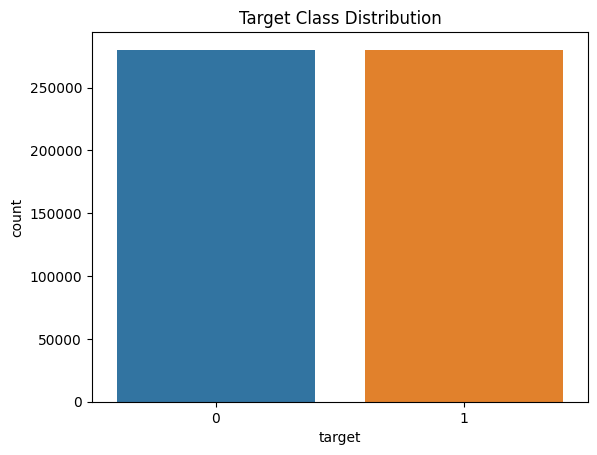

In [7]:
# Check class balance
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

In [8]:
# Drop unused columns
df = df.drop(columns=['id', 'path'])

In [9]:
# Split features & target
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

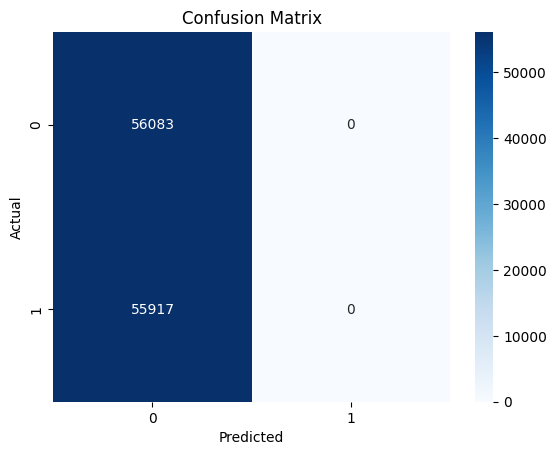

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56083
           1       0.00      0.00      0.00     55917

    accuracy                           0.50    112000
   macro avg       0.25      0.50      0.33    112000
weighted avg       0.25      0.50      0.33    112000



In [12]:
# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

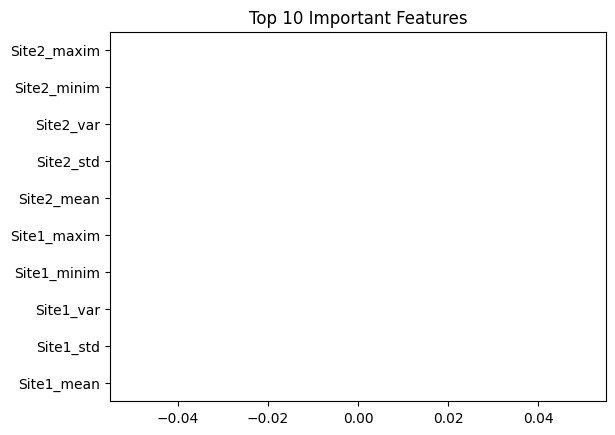

In [13]:
# Plot top features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

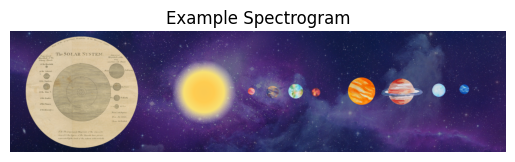

In [14]:
import matplotlib.image as mpimg

# Load and show one image
img = mpimg.imread('/kaggle/input/g2net-gravitational-wave-dataset/pngs/MAerCzs.png')
plt.imshow(img)
plt.title("Example Spectrogram")
plt.axis('off')
plt.show()